In [1]:
import os, sys

In [23]:
import random, json

In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

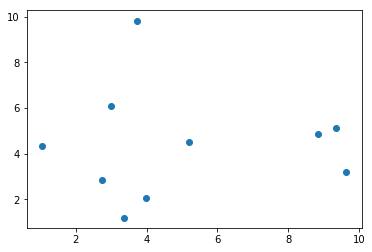

In [5]:
plt.scatter(x = [random.uniform(1,10) for i in range(10)]
           ,y = [random.uniform(1,10) for i in range(10)])

In [12]:
from db_module import TasPerfDB
from schema_module import TimeAnalysisSchema

In [13]:
db = TasPerfDB()
tas = TimeAnalysisSchema()

In [63]:
import sqlite3

In [73]:
data_input = []

conn = sqlite3.connect("../data/perf/perf_db.db")
c = conn.cursor()

_games = [    "GarryKasparovGames.txt-77"
             ,"GarryKasparovGames.txt-78"
             ,"GarryKasparovGames.txt-77"
        ]

for gameId in _games:

    c.execute("select * from basic_tas where id = ?", (gameId,))
    ret = c.fetchall()
    data_input.append(ret[0])

conn.close()
print str(data_input)[:400]


[(u'GarryKasparovGames.txt-77', u'{"meta_analysis": {"analysis_type": "analysis2", "algo_style": "naive_yk"}, "log": {"s_instructions": "1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 a6 6. Be3 e6 7. g4 h6 8. f4 e5 9. Nf5 Nc6 10. Qf3 g6 11. O-O-O gxf5 12. exf5 e4 13. Nxe4 Nxe4 14. Qxe4+ Qe7 15. Qd3 Bg7 16. Bd2 O-O 17. g5 hxg5 18. fxg5 Qe5 19. f6 Bf5 20. Qg3 Rfc8 21. Bc3 Nb4 22. Bxe5 Rxc2+ 23. Kb


In [74]:
len (data_input[0])

2

In [69]:
db.closeConn()

In [10]:
basic_tbl = db.select_all_basic()

In [11]:
len(basic_tbl)

10

In [19]:
print(  str(basic_tbl[0])[:2800] )

(u'GarryKasparovGames.txt-2', u'{"meta_analysis": {"analysis_type": "analysis2", "algo_style": "opt_yk"}, "log": {"s_instructions": "1. d4 d5 2. c4 c6 3. Nf3 Nf6 4. Nc3 e6 5. Bg5 Nbd7 6. e3 Qa5 7. Nd2 Bb4 8. Qc2 O-O 9. Be2 e5 10. O-O exd4 11. Nb3 Qb6 12. exd4 dxc4 13. Bxc4 a5 14. a4 Qc7 15. Rae1 h6 16. Bh4 Bd6 17. h3 Nb6 18. Bxf6 Nxc4 19. Ne4 Bh2+ 20. Kh1 Nd6 21. Kxh2 Nxe4+ 22. Be5 Nd6 23. Qc5 Rd8 24. d5 Qd7 25. Nd4 Nf5 26. dxc6 bxc6 27. Nxc6 Re8 28. Rd1 Qe6 29. Rfe1 Bb7 30. Nd4 Nxd4 31. Qxd4 Qg6 32. Qg4 Qxg4 33. hxg4 Bc6 34. b3 f6 35. Bc3 Rxe1 36. Rxe1 Bd5 37. Rb1 Kf7 38. Kg3 Rb8 39. b4 axb4 40. Bxb4 Bc4 41. a5 Ba6 42. f3 Kg6 43. Kf4 h5 44. gxh5+ Kxh5 45. Rh1+ Kg6 46. Bc5 Rb2 47. Kg3 Ra2 48. Bb6 Kf7 49. Rc1 g5 50. Rc7+ Kg6 51. Rc6 Bf1 52. Bf2 \\n", "num_available": [20, 20, 27, 28, 30, 29, 32, 31, 35, 32, 39, 30, 34, 37, 41, 40, 46, 35, 53, 35, 51, 37, 50, 31, 50, 31, 53, 30, 53, 34, 55, 35, 50, 33, 49, 32, 46, 38, 1, 40, 41, 29, 5, 35, 42, 29, 40, 31, 44, 28, 49, 28, 48, 32, 50, 35, 

In [87]:


N = 50
ALGO_STYLE = "naive_yk"
ALGO_STYLE = "opt_yk"
data = []
# data2 = []

for record in basic_tbl:
# for record in data_input:
    
    _gameId = record[0]
    _tas = json.loads(record[1])
    _algo_style = _tas['meta_analysis']['algo_style']
    
    for trial in _tas['trials']:
    
        _n = trial['trial_meta']['N']
        
        if _n >= N and \
            _algo_style == ALGO_STYLE:
            
            _temp = [
                    _gameId
                    ,_n
                    ,trial['trial_data']
                    ,_tas['log']['num_available']
                    ,_tas['log']['num_player_pieces']
                    ]
            
            data.append(_temp)

print len(data)
        
        

20


In [76]:
data2

[[u'GarryKasparovGames.txt-77',
  30,
  [0.023799999554951986,
   0.02349999745686849,
   0.0340666929880778,
   0.02536664009094238,
   0.03163332144419352,
   0.03636667728424072,
   0.04386670589447021,
   0.029633315404256184,
   0.045766631762186684,
   0.03606669902801514,
   0.04856666723887126,
   0.03336666425069173,
   0.04760000705718994,
   0.03233331839243571,
   0.047300012906392415,
   0.032833313941955565,
   0.04686667919158936,
   0.033633335431416826,
   0.0536666472752889,
   0.04093333880106608,
   0.05463333129882812,
   0.03700001239776611,
   0.048866677284240725,
   0.03879997730255127,
   0.04459998607635498,
   0.03750001589457194,
   0.03993335564931234,
   0.02903329531351725,
   0.04610002835591634,
   0.034366663297017416,
   0.03623332182566325,
   0.0458666721979777,
   0.0350333293279012,
   0.04370001157124837,
   0.03320001761118571,
   0.036899964014689125,
   0.032200018564860024,
   0.04246664841969808,
   0.03350002765655517,
   0.045733332633972

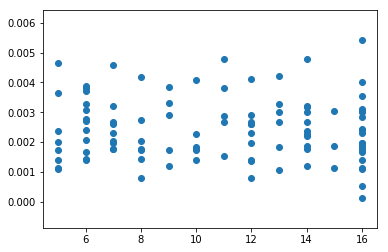

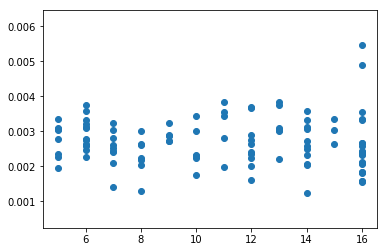

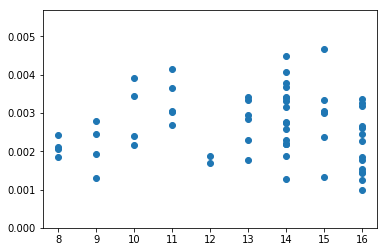

In [88]:
epsilon = 0.001

# for i in range(10):

for i in range(3):

    y_data0 = data[i][2]
    x_data0 = data[i][4]  #num_pieces
#     x_data0 = data[i][3]  #moves_avail
#     x_data0 = [_[0] * _[1] for _ in zip(data2[i][3], data2[i][4])]

    # plt.scatter(x = range(len(data0)), y=y_data0)
    plt.scatter(x = x_data0 , y=y_data0)
    plt.ylim(min(y_data0) - epsilon, max(y_data0) + epsilon)
    plt.show()

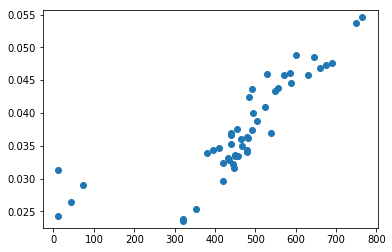

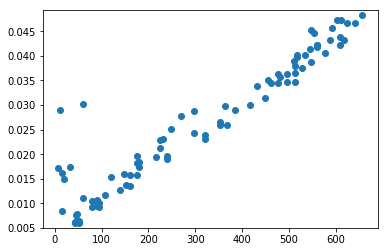

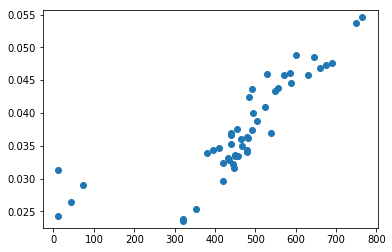

In [82]:
epsilon = 0.001

# for i in range(10):

for i in range(3):

    y_data0 = data2[i][2]
#     x_data0 = data2[i][4]  #num_pieces
#     x_data0 = data2[i][3]  #moves_avail
    x_data0 = [_[0] * _[1] for _ in zip(data2[i][3], data2[i][4])]

    # plt.scatter(x = range(len(data0)), y=y_data0)
    plt.scatter(x = x_data0 , y=y_data0)
    plt.ylim(min(y_data0) - epsilon, max(y_data0) + epsilon)
    plt.show()
    # print 'max ' , str(max(y_data0)), ' min ', str(min(y_data0))

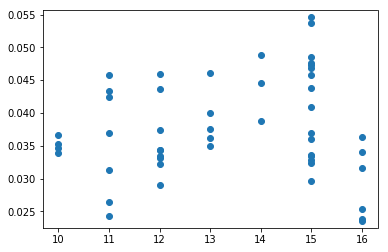

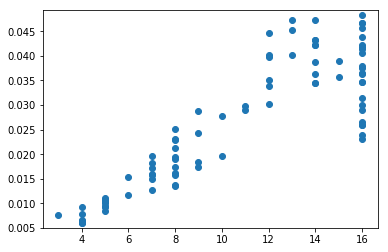

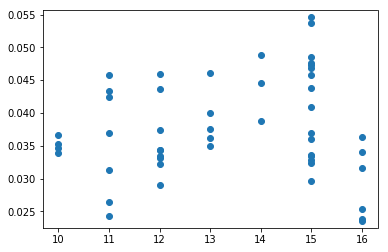

In [89]:
epsilon = 0.001

# for i in range(10):

for i in range(3):

    y_data0 = data2[i][2]
    x_data0 = data2[i][4]  #num_pieces
#     x_data0 = data2[i][3]  #moves_avail
#     x_data0 = [_[0] * _[1] for _ in zip(data2[i][3], data2[i][4])]

    # plt.scatter(x = range(len(data0)), y=y_data0)
    plt.scatter(x = x_data0 , y=y_data0)
    plt.ylim(min(y_data0) - epsilon, max(y_data0) + epsilon)
    plt.show()
    # print 'max ' , str(max(y_data0)), ' min ', str(min(y_data0))

In [45]:
filter(lambda x: len(x[2]) != len(x[3]), data)

[]

In [58]:
for i in range(10):
    print len(data[i][3])
    print len(data[i][2])

103
103
103
103
63
63
63
63
41
41
41
41
117
117
117
117
132
132
101
101
